In [1]:
import pandas  as pd
import numpy as np 
import seaborn as  sns
from sklearn.linear_model import LogisticRegression

In [3]:
data=pd.read_csv(r"bank_data.csv")

In [4]:
data

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
0,58,0,2143,1,0,261,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,76,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,0,...,0,0,0,0,0,0,1,0,0,1
45207,71,0,1729,0,0,456,2,-1,0,0,...,0,0,1,0,0,0,0,0,0,1
45208,72,0,5715,0,0,1127,5,184,3,0,...,0,0,1,0,0,0,0,0,0,1
45209,57,0,668,0,0,508,4,-1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.shape

(45211, 32)

In [6]:
data.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'poutfailure', 'poutother', 'poutsuccess',
       'poutunknown', 'con_cellular', 'con_telephone', 'con_unknown',
       'divorced', 'married', 'single', 'joadmin.', 'joblue.collar',
       'joentrepreneur', 'johousemaid', 'jomanagement', 'joretired',
       'joself.employed', 'joservices', 'jostudent', 'jotechnician',
       'jounemployed', 'jounknown', 'y'],
      dtype='object')

In [7]:
data.dtypes

age                int64
default            int64
balance            int64
housing            int64
loan               int64
duration           int64
campaign           int64
pdays              int64
previous           int64
poutfailure        int64
poutother          int64
poutsuccess        int64
poutunknown        int64
con_cellular       int64
con_telephone      int64
con_unknown        int64
divorced           int64
married            int64
single             int64
joadmin.           int64
joblue.collar      int64
joentrepreneur     int64
johousemaid        int64
jomanagement       int64
joretired          int64
joself.employed    int64
joservices         int64
jostudent          int64
jotechnician       int64
jounemployed       int64
jounknown          int64
y                  int64
dtype: object

In [9]:
data.describe()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.00000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,258.163080,2.763841,40.197828,0.580323,0.108403,...,0.027427,0.209197,0.050076,0.034925,0.09188,0.020747,0.168034,0.028820,0.006370,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,257.527812,3.098021,100.128746,2.303441,0.310892,...,0.163326,0.406740,0.218105,0.183592,0.28886,0.142538,0.373901,0.167303,0.079559,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


Checking For Missing Values

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              45211 non-null  int64
 1   default          45211 non-null  int64
 2   balance          45211 non-null  int64
 3   housing          45211 non-null  int64
 4   loan             45211 non-null  int64
 5   duration         45211 non-null  int64
 6   campaign         45211 non-null  int64
 7   pdays            45211 non-null  int64
 8   previous         45211 non-null  int64
 9   poutfailure      45211 non-null  int64
 10  poutother        45211 non-null  int64
 11  poutsuccess      45211 non-null  int64
 12  poutunknown      45211 non-null  int64
 13  con_cellular     45211 non-null  int64
 14  con_telephone    45211 non-null  int64
 15  con_unknown      45211 non-null  int64
 16  divorced         45211 non-null  int64
 17  married          45211 non-null  int64
 18  single

In [11]:
data.isnull().sum()

age                0
default            0
balance            0
housing            0
loan               0
duration           0
campaign           0
pdays              0
previous           0
poutfailure        0
poutother          0
poutsuccess        0
poutunknown        0
con_cellular       0
con_telephone      0
con_unknown        0
divorced           0
married            0
single             0
joadmin.           0
joblue.collar      0
joentrepreneur     0
johousemaid        0
jomanagement       0
joretired          0
joself.employed    0
joservices         0
jostudent          0
jotechnician       0
jounemployed       0
jounknown          0
y                  0
dtype: int64

In [12]:
y=data.iloc[:,-1:]
y.shape

(45211, 1)

In [13]:
x=data.iloc[:,:-1]

In [14]:
x

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,joentrepreneur,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown
0,58,0,2143,1,0,261,1,-1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,33,0,2,1,1,76,1,-1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,456,2,-1,0,0,...,0,0,0,1,0,0,0,0,0,0
45208,72,0,5715,0,0,1127,5,184,3,0,...,0,0,0,1,0,0,0,0,0,0
45209,57,0,668,0,0,508,4,-1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
classifier=LogisticRegression()
classifier.fit(x,y)

C:\Users\SARAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\SARAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_pred=classifier.predict(x)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [19]:
confusion_matrix=confusion_matrix(y,y_pred)
print(confusion_matrix)

[[39165   757]
 [ 4112  1177]]


In [20]:
((39165+1177)/(39165+757+4112+1177))*100
#This accuracy is useless because it Was Un- Balenced Data

89.23049700294176

In [21]:
y_proba=classifier.predict_proba(x)
y_proba


array([[0.96497934, 0.03502066],
       [0.97525637, 0.02474363],
       [0.98131657, 0.01868343],
       ...,
       [0.20350396, 0.79649604],
       [0.88694236, 0.11305764],
       [0.92842342, 0.07157658]])

In [22]:
classifier.coef_

array([[-1.77904139e-02, -2.80778802e-02,  2.37676842e-05,
        -1.00975797e+00, -2.83576295e-01,  3.81284847e-03,
        -3.31182116e-01,  2.61515104e-03, -2.25148564e-01,
        -1.91253891e-01, -4.75516772e-02,  4.35617147e-01,
        -6.61668624e-01,  8.89854376e-02,  7.57452611e-02,
        -6.29587744e-01,  2.64634329e-02, -2.43897792e-01,
        -2.47422686e-01, -5.64664566e-02, -3.76566635e-01,
        -3.68115410e-02, -9.58757964e-03,  1.31984062e-02,
         2.46898679e-01, -2.43413816e-02, -1.40027161e-01,
         3.04038851e-02, -1.20648187e-01,  4.25139478e-03,
         4.83953221e-03]])

In [23]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.61      0.22      0.33      5289

    accuracy                           0.89     45211
   macro avg       0.76      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



# Here we can see that Recall and f1-Score of 0 are high enough but when compared to 1 which is pretty less 

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(y,y_pred)
Logit_roc_score

0.6017876828997866

Text(0, 0.5, 'True Positive Rate')

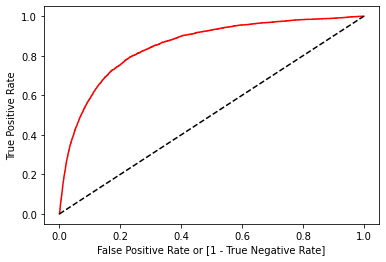

In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, y_proba[:,1])

auc = roc_auc_score(y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [27]:
auc

0.6017876828997866